In [30]:
import pandas as pd
import numpy as np
import geopandas as gpd

import matplotlib.pylab as pl

from sklearn.cluster import KMeans
import shapely.wkt as shpwkt

from sklearn.preprocessing import scale
from pandas.tools.plotting import scatter_matrix

In [2]:
DATA = '../data'

In [3]:
yelp = pd.read_csv(DATA + '/Yelp_Weights_subset.csv', index_col=0)
yelp.head()

,Unnamed: 0.1,FIPS,geometry,Total,asian,european,halal,hispanic,midmed,Cambodian,...,Peruvian,Puerto Rican,Russian,Salvadoran,Shanghainese,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese
0,0,36085000900,POLYGON ((-74.07920577013245 40.64343078374567...,1,1,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,36061009800,POLYGON ((-73.96432543478758 40.75638153099091...,4,3,4,3,3,4,0,...,0,2,0,0,1,2,3,2,2,2
2,2,36061010000,POLYGON ((-73.96802436915851 40.75957814005282...,4,3,4,3,4,4,0,...,0,1,0,0,1,1,4,3,2,2
3,3,36061010200,POLYGON ((-73.97124277307127 40.76093641847906...,4,3,4,4,4,4,0,...,1,1,0,0,2,1,3,2,2,1
4,4,36061010400,POLYGON ((-73.97445730550224 40.76229308352487...,4,3,4,4,4,4,0,...,1,0,2,0,1,1,3,2,1,2


In [4]:
X = yelp.iloc[:,9:]
X.head()

,Cambodian,Caribbean,Chinese,Colombian,Cuban,Dominican,French,German,Greek,Halal,...,Peruvian,Puerto Rican,Russian,Salvadoran,Shanghainese,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese
0,0,1,1,0,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,0,0
1,0,2,3,0,1,0,3,2,3,3,...,0,2,0,0,1,2,3,2,2,2
2,0,2,2,0,2,0,3,1,3,3,...,0,1,0,0,1,1,4,3,2,2
3,0,2,2,0,3,0,4,1,2,4,...,1,1,0,0,2,1,3,2,2,1
4,0,1,1,0,3,1,4,0,3,3,...,1,0,2,0,1,1,3,2,1,2


In [5]:
# As an alternative, look for an elbow in the within-cluster SSE (k-means example):
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i, random_state=3391)
    res=km.fit(X)
    SSE.append(res.inertia_)
print(SSE)

[30232.728865524594, 26835.70489309209, 25239.573109861056, 23768.07344834577, 22496.053713374135, 21501.155855347555, 20581.516626975, 19971.982189333467]


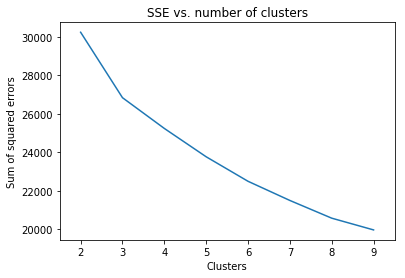

In [6]:
pl.gca()
pl.plot(range(2,10),SSE)
pl.xlabel("Clusters")
pl.ylabel("Sum of squared errors")
pl.title("SSE vs. number of clusters")
pl.xlim(1.5,9.5)
pl.show()

In [7]:
km = KMeans(random_state=3391,n_clusters=7)
res=km.fit(X)

In [8]:
res.labels_

array([1, 2, 2, ..., 6, 5, 1], dtype=int32)

In [9]:
yelp['label'] = res.labels_

In [11]:
rs =pd.DataFrame(km.transform(X))
rs = pd.concat((rs,pd.DataFrame(km.fit_predict(X))),axis=1)
rs.columns=list(range(7))+["cluster"]
yelp.loc[:,"score"]=rs.apply(lambda x: x[int(x["cluster"])],axis=1)

In [12]:
yelp.sort_values('score', ascending=False, inplace=True)
yelp.head()

,Unnamed: 0.1,FIPS,geometry,Total,asian,european,halal,hispanic,midmed,Cambodian,...,Russian,Salvadoran,Shanghainese,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese,label,score
1692,1692,36081038301,POLYGON ((-73.83689970202342 40.76269811821739...,4,4,0,2,1,0,0,...,0,0,3,3,0,0,0,3,1,7.983924
2075,2075,36061002700,POLYGON ((-73.99694730386304 40.71207168683073...,4,4,2,0,3,2,0,...,0,0,3,3,2,0,0,4,5,7.782513
1970,1970,36061000800,POLYGON ((-73.99190544366451 40.70952539658225...,4,4,2,0,2,2,0,...,0,0,3,2,2,0,0,4,5,7.156539
1824,1824,36081084900,POLYGON ((-73.83013807735681 40.75391522523082...,4,4,0,3,1,0,0,...,0,0,3,3,1,0,0,3,1,7.061485
1578,1578,36061004100,POLYGON ((-73.99379593869142 40.72093753746572...,4,4,3,1,4,2,0,...,0,0,3,2,4,0,0,4,2,6.968952


In [13]:
yelp['geometry'] = yelp['geometry'].apply(lambda x: shpwkt.loads(x))

In [14]:
yelp = gpd.GeoDataFrame(yelp, geometry='geometry')
yelp.head()

,Unnamed: 0.1,FIPS,geometry,Total,asian,european,halal,hispanic,midmed,Cambodian,...,Russian,Salvadoran,Shanghainese,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese,label,score
1692,1692,36081038301,POLYGON ((-73.83689970202342 40.76269811821739...,4,4,0,2,1,0,0,...,0,0,3,3,0,0,0,3,1,7.983924
2075,2075,36061002700,POLYGON ((-73.99694730386304 40.71207168683073...,4,4,2,0,3,2,0,...,0,0,3,3,2,0,0,4,5,7.782513
1970,1970,36061000800,POLYGON ((-73.99190544366451 40.70952539658225...,4,4,2,0,2,2,0,...,0,0,3,2,2,0,0,4,5,7.156539
1824,1824,36081084900,POLYGON ((-73.83013807735681 40.75391522523082...,4,4,0,3,1,0,0,...,0,0,3,3,1,0,0,3,1,7.061485
1578,1578,36061004100,POLYGON ((-73.99379593869142 40.72093753746572...,4,4,3,1,4,2,0,...,0,0,3,2,4,0,0,4,2,6.968952


In [15]:
colors = ['#738E5B', '#6BB2D6', '#FC917E', '#E5BA5E', '#8b8b8b', '#936991', '#726260']
from matplotlib.colors import LinearSegmentedColormap
cm = LinearSegmentedColormap.from_list(
        'Custom1', colors, N=7)

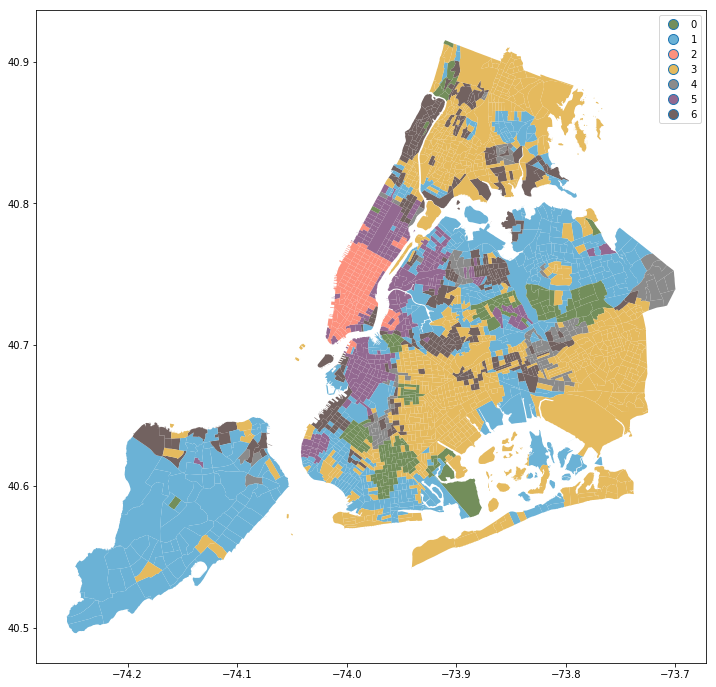

In [16]:
fig = pl.figure(figsize=(12,12))
ax = fig.add_subplot(111)
# ct_2010.plot(ax=ax, edgecolor='lightgray', color='white')
yelp.plot(ax=ax, column='label', cmap=cm, edgecolor=None, categorical=True, legend=True);

In [17]:
yelp['label'].value_counts()

3    778
1    469
6    291
5    239
0    159
2    117
4    113
Name: label, dtype: int64

In [18]:
yelp.groupby('label').mean().iloc[:,8:-1].T

label,0,1,2,3,4,5,6
Cambodian,0.000000,0.000000,0.376068,0.011568,0.000000,0.016736,0.020619
Caribbean,0.358491,0.196162,0.641026,1.019280,1.362832,0.543933,0.690722
Chinese,0.767296,1.264392,2.376068,0.347044,1.371681,1.589958,1.250859
Colombian,0.094340,0.174840,0.042735,0.033419,0.221239,0.422594,0.350515
Cuban,0.006289,0.021322,1.555556,0.030848,0.044248,0.543933,0.237113
Dominican,0.138365,0.061834,0.572650,0.177378,0.823009,0.673640,2.498282
French,0.025157,0.155650,3.059829,0.039846,0.123894,1.087866,0.161512
German,0.006289,0.121535,0.769231,0.012853,0.026549,0.380753,0.154639
Greek,0.132075,0.524520,1.769231,0.033419,0.097345,1.100418,0.178694
Halal,0.477987,0.556503,2.427350,0.149100,1.761062,1.338912,0.333333


In [19]:
yelp.sort_values('score', ascending=False, inplace=True)
yelp.head(10)

,Unnamed: 0.1,FIPS,geometry,Total,asian,european,halal,hispanic,midmed,Cambodian,...,Russian,Salvadoran,Shanghainese,Taiwanese,Thai,Turkish,Venezuelan,Vietnamese,label,score
1692,1692,36081038301,POLYGON ((-73.83689970202342 40.76269811821739...,4,4,0,2,1,0,0,...,0,0,3,3,0,0,0,3,1,7.983924
2075,2075,36061002700,POLYGON ((-73.99694730386304 40.71207168683073...,4,4,2,0,3,2,0,...,0,0,3,3,2,0,0,4,5,7.782513
1970,1970,36061000800,POLYGON ((-73.99190544366451 40.70952539658225...,4,4,2,0,2,2,0,...,0,0,3,2,2,0,0,4,5,7.156539
1824,1824,36081084900,POLYGON ((-73.83013807735681 40.75391522523082...,4,4,0,3,1,0,0,...,0,0,3,3,1,0,0,3,1,7.061485
1578,1578,36061004100,POLYGON ((-73.99379593869142 40.72093753746572...,4,4,3,1,4,2,0,...,0,0,3,2,4,0,0,4,2,6.968952
740,740,36081086500,POLYGON ((-73.82260198317297 40.76275935649199...,4,4,0,2,0,0,0,...,0,0,3,3,1,0,0,3,1,6.942420
738,738,36081085500,POLYGON ((-73.82063593339372 40.75887226784799...,3,4,0,1,0,0,0,...,0,0,3,3,1,0,0,3,1,6.913490
1503,1503,36061007500,POLYGON ((-74.00596018042596 40.73584500733544...,3,2,4,0,4,3,0,...,0,0,0,0,0,2,0,0,5,6.864083
1928,1928,36061002500,"POLYGON ((-73.9960189839576 40.70891622435003,...",4,4,3,3,2,2,0,...,0,0,3,2,2,0,0,4,2,6.827707
994,994,36081148300,POLYGON ((-73.73937598887052 40.77601366916728...,3,3,3,0,0,3,0,...,0,0,0,0,0,3,0,3,1,6.647937


In [20]:
yelp.groupby('label')['score'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,159.0,2.802262,0.775559,1.620214,2.165901,2.624737,3.283636,5.049061
1,469.0,3.079320,0.946609,1.585841,2.451441,2.874594,3.609241,7.983924
2,117.0,4.744586,0.765335,3.440901,4.207499,4.589338,5.172459,6.968952
3,778.0,1.875895,0.792592,0.691593,1.231609,1.773526,2.327912,4.630029
4,113.0,3.466607,0.749012,2.031181,3.001775,3.332866,3.965787,5.699094
5,239.0,4.330779,0.837071,2.403481,3.788680,4.229621,4.812002,7.782513
6,291.0,3.262898,0.820243,1.642180,2.659797,3.140882,3.828427,5.454830


In [21]:
acs = pd.read_csv(DATA + '/features/ACSselectedData.csv', index_col=0)
acs.head()

,FIPS,Census Tract,Pop Density,Income,Age,Household Size,Total Pop,Mexican,Cuban,Dominican,...,Italian,Polish,Russian,Turkish,Haitian,White,Black or African American,American Indian and Alaska Native,Asian,Hispanic or Latino
1,36005000100,100,11586.310,NaN,32.1,NaN,7503,1.865920,0.279888,5.077969,...,0.413168,0.453152,0.439824,0.000000,0.613088,12.435026,62.601626,0.186592,1.799280,29.854725
2,36005000200,200,28365.120,70893.0,38.6,3.94,5251,3.865930,0.190440,12.816606,...,0.000000,0.685584,0.000000,0.000000,0.000000,43.458389,24.795277,0.000000,2.799467,74.957151
3,36005000400,400,20096.470,76667.0,39.4,3.10,5980,1.672241,1.521739,13.244147,...,2.541806,0.351171,0.150502,0.000000,0.000000,43.361204,33.762542,0.317726,0.953177,64.682274
4,36005001600,1600,32334.870,31540.0,36.9,2.94,6056,0.577939,1.469617,29.920740,...,0.743065,0.132100,0.115588,0.000000,0.528402,43.312417,36.079921,0.000000,0.000000,66.727213
5,36005001900,1900,4164.445,39130.0,32.5,2.27,2682,4.809843,0.000000,17.002237,...,2.274422,0.298285,0.260999,0.111857,0.820283,16.853095,37.061894,0.000000,1.864280,54.026846


In [22]:
df_merged = yelp[['FIPS', 'label']].merge(acs, on='FIPS')
df_merged.head()

,FIPS,label,Census Tract,Pop Density,Income,Age,Household Size,Total Pop,Mexican,Cuban,...,Italian,Polish,Russian,Turkish,Haitian,White,Black or African American,American Indian and Alaska Native,Asian,Hispanic or Latino
0,36081038301,1,38301,0.00,NaN,NaN,NaN,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,36061002700,5,2700,61165.00,56422.0,49.9,2.21,1400,0.000000,0.000000,...,3.571429,1.071429,0.928571,2.928571,0.0,14.857143,0.642857,1.071429,76.285714,1.357143
2,36061000800,5,800,109122.90,31129.0,44.1,2.71,9299,0.000000,0.000000,...,3.043338,0.129046,0.000000,0.000000,0.0,10.592537,0.967846,0.161308,83.912249,2.849769
3,36081084900,1,84900,68889.65,26512.0,36.5,3.54,8073,0.000000,0.000000,...,0.445931,0.000000,0.000000,0.000000,0.0,3.455964,6.899542,0.445931,73.479500,13.848631
4,36061004100,2,4100,112874.90,76522.0,33.7,2.29,8336,1.319578,0.539827,...,5.782150,1.535509,1.475528,0.263916,0.0,36.552303,1.943378,0.419866,55.710173,5.854127


* 0 - Jewish
* 1 - Chinese, Italian, Japanese
* 2 - Lower Manhattan
* 3 - Deserts
* 4 - South Asian 
* 5 - Downtown Brooklyn / Upper Manhattan
* 6 - Dominican / Latin American / Mexican

In [23]:
df_merged.groupby('label').mean().iloc[:,2:].T

label,0,1,2,3,4,5,6
Pop Density,46428.005813,36647.947805,74178.859519,46157.602193,55434.041327,68147.909425,63670.625015
Income,56668.290323,62565.842572,110530.852174,51414.684350,55218.351351,88031.300847,47981.327402
Age,34.354140,39.401096,37.245690,36.329605,36.403571,37.593671,34.719014
Household Size,3.057628,2.802511,1.808190,2.976812,3.078571,2.238178,3.073873
Total Pop,3622.817610,3671.635394,5151.982906,3536.683398,4324.548673,4443.523013,4338.402062
Mexican,2.266973,3.385777,1.384242,2.831204,4.149892,3.771817,8.299880
Cuban,0.399718,0.459114,0.619717,0.352018,0.446709,0.637735,0.540070
Dominican,2.595004,3.712204,1.769807,9.337055,4.142292,2.499117,14.915096
Salvadoran,0.247222,0.664492,0.162622,0.572596,1.006241,0.175004,0.891668
Colombian,0.843250,1.554565,0.547556,0.666944,1.884995,1.460707,1.724254


In [24]:
df_final = pd.read_csv(DATA + '/Final_Merged.csv')
df_final.head()

,FIPS,Census Tract,Pop Density,Income,Age,Household Size,Total Pop,ACS_Mexican,ACS_Cuban,ACS_Dominican,...,Yelp_Puerto Rican,Yelp_Russian,Yelp_Salvadoran,Yelp_Shanghainese,Yelp_Singaporean,Yelp_Taiwanese,Yelp_Thai,Yelp_Turkish,Yelp_Venezuelan,Yelp_Vietnamese
0,36005000100,100.0,11586.310,NaN,32.1,NaN,7503.0,1.865920,0.279888,5.077969,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36005000200,200.0,28365.120,70893.0,38.6,3.94,5251.0,3.865930,0.190440,12.816606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36005000400,400.0,20096.470,76667.0,39.4,3.10,5980.0,1.672241,1.521739,13.244147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36005001600,1600.0,32334.870,31540.0,36.9,2.94,6056.0,0.577939,1.469617,29.920740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36005001900,1900.0,4164.445,39130.0,32.5,2.27,2682.0,4.809843,0.000000,17.002237,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
df_final = df_final.merge(yelp[['FIPS', 'label']], on='FIPS')
df_final.head()

,FIPS,Census Tract,Pop Density,Income,Age,Household Size,Total Pop,ACS_Mexican,ACS_Cuban,ACS_Dominican,...,Yelp_Russian,Yelp_Salvadoran,Yelp_Shanghainese,Yelp_Singaporean,Yelp_Taiwanese,Yelp_Thai,Yelp_Turkish,Yelp_Venezuelan,Yelp_Vietnamese,label
0,36005000100,100.0,11586.310,NaN,32.1,NaN,7503.0,1.865920,0.279888,5.077969,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,36005000200,200.0,28365.120,70893.0,38.6,3.94,5251.0,3.865930,0.190440,12.816606,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2,36005000400,400.0,20096.470,76667.0,39.4,3.10,5980.0,1.672241,1.521739,13.244147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,36005001600,1600.0,32334.870,31540.0,36.9,2.94,6056.0,0.577939,1.469617,29.920740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
4,36005001900,1900.0,4164.445,39130.0,32.5,2.27,2682.0,4.809843,0.000000,17.002237,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6


In [26]:
df_final.to_csv(DATA + '/Classifed_CensusTracts.csv', index=False)

In [27]:
df_final.columns

Index(['FIPS', 'Census Tract', 'Pop Density', 'Income', 'Age',
       'Household Size', 'Total Pop', 'ACS_Mexican', 'ACS_Cuban',
       'ACS_Dominican', 'ACS_Salvadoran', 'ACS_Colombian', 'ACS_Peruvian',
       'ACS_Venezuelan', 'ACS_Indian', 'ACS_Cambodian', 'ACS_Chinese',
       'ACS_Filipino', 'ACS_Japanese', 'ACS_Korean', 'ACS_Laotian',
       'ACS_Malaysian', 'ACS_Nepalese', 'ACS_Pakistani', 'ACS_Taiwanese',
       'ACS_Thai', 'ACS_Vietnamese', 'ACS_Lebanese', 'ACS_Moroccan',
       'ACS_Armenian', 'ACS_French', 'ACS_German', 'ACS_Greek', 'ACS_Irish',
       'ACS_Italian', 'ACS_Polish', 'ACS_Russian', 'ACS_Turkish',
       'ACS_Haitian', 'ACS_White', 'ACS_Black or African American',
       'ACS_American Indian and Alaska Native', 'ACS_Asian',
       'ACS_Hispanic or Latino', 'PlaceFIPS', 'TractFIPS', 'Place_TractID',
       'DIABETES_CrudePrev', 'HIGHCHOL_CrudePrev', 'OBESITY_CrudePrev',
       'Yelp_Total', 'Yelp_asian', 'Yelp_european', 'Yelp_halal',
       'Yelp_hispanic', 'Yel

/Users/unissechua/devel/PUI2017/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


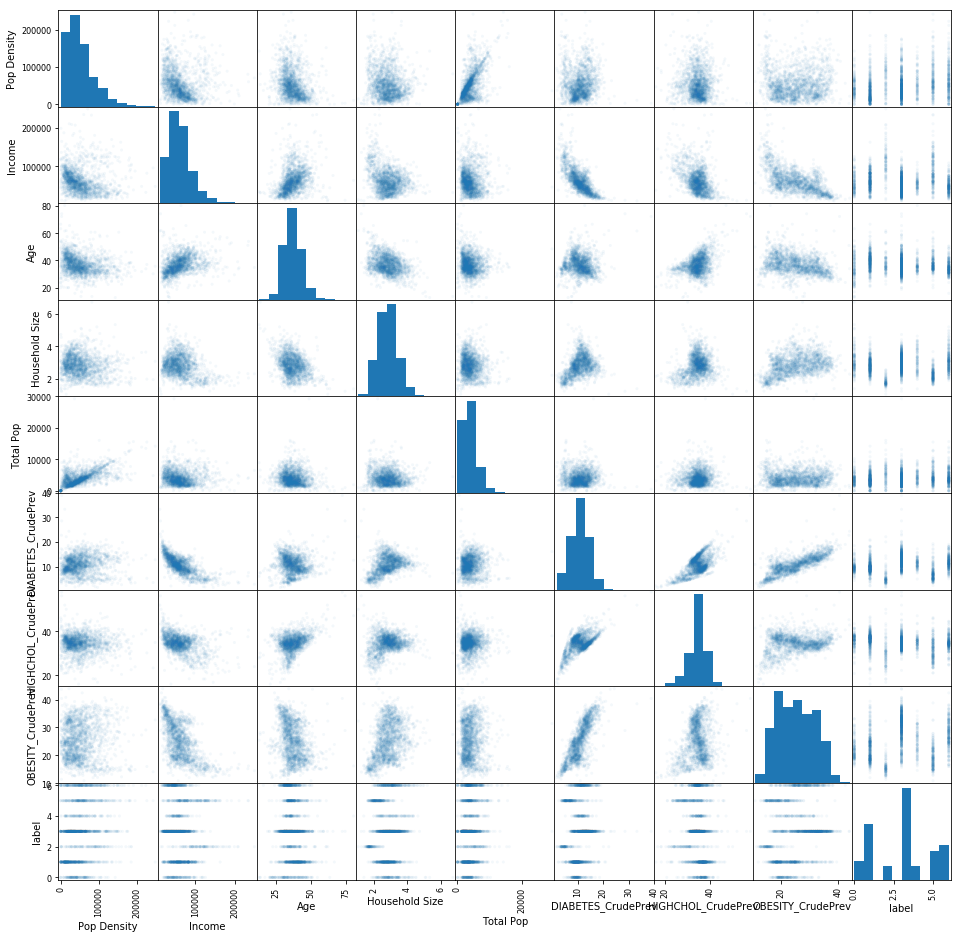

In [31]:
X = df_final[['Pop Density', 'Income', 'Age',
       'Household Size', 'Total Pop', 'DIABETES_CrudePrev', 'HIGHCHOL_CrudePrev', 'OBESITY_CrudePrev',
          'label']]
scatter_matrix(X, alpha=0.05, figsize=(16, 16), diagonal='hist');